In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web




In [3]:
style.use('ggplot')
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2019, 12, 31)


df = web.DataReader('BRKB', 'yahoo', start, end)
df.to_csv("BRK.B.csv")

In [27]:
new_df = pd.read_csv("EquinixStock.csv", parse_dates=True, index_col=0)

In [28]:
new_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-29,558.799988,554.960022,556.710022,557.719971,339500.0,557.719971
2019-08-30,559.549988,553.219971,558.000000,556.280029,288200.0,556.280029
2019-09-03,566.390015,554.210022,555.380005,565.909973,296600.0,565.909973
2019-09-04,567.890015,555.030029,564.900024,558.489990,445900.0,558.489990
2019-09-05,560.000000,547.690002,558.760010,551.000000,486500.0,551.000000
2019-09-06,560.669983,551.710022,552.440002,554.090027,366900.0,554.090027
2019-09-09,554.309998,536.760010,554.099976,538.210022,397000.0,538.210022
2019-09-10,535.510010,525.380005,535.510010,531.440002,496300.0,531.440002
2019-09-11,533.359985,526.000000,530.190002,528.440002,529900.0,528.440002


In [30]:
new_df['100ma'] = new_df['Adj Close'].rolling(window=100, min_periods=0).mean()
new_df.dropna(inplace=True)
new_df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2000-08-11,448.0,384.0,408.0,420.0,792500.0,350.447662,350.447662
2000-08-14,420.0,384.0,419.0,384.0,80200.0,320.409241,335.428452
2000-08-15,396.0,384.0,389.0,388.0,48400.0,323.746918,331.534607
2000-08-16,418.0,386.0,386.0,396.0,42100.0,330.422089,331.256477
2000-08-17,400.0,382.0,392.0,384.0,47200.0,320.409241,329.087030


KeyError: '100ma'

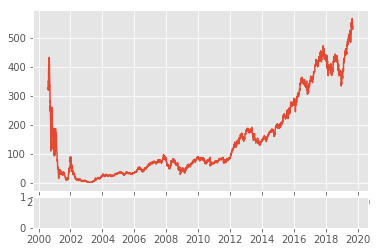

In [41]:
ax1  = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2  = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()